# Chipotle Restaurant Data Analysis

In this analysis I'm going to answer the following questions: 1) What is the general distribution of the total order value? What does a typical order cost?

2) What are some typical combinations in most orders. This can tell us if Chipotle should create meals so that the customer can just point to meal 1 (chips, burrito, drink) or meal 2, etc.

3) Given a specific item, what has been ordered most frequently with it? This can help create a digital ordering menu that makes it easy for a customer to select items as they choose the first item, they get shown the second item, etc, based on historical data.

Let's first import the necessary libraries. We'll be working mostly with pandas, but the other libraries will be helpful to visualize some data.

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [6]:
#Let's read in the data - our dataset is in the form of a tsv file. To read it in we use pd.read_csv but specify sep='\t'
chipotle = pd.read_csv('/content/drive/MyDrive/chipotle.tsv.txt', sep='\t')

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


After loading the data into the program, it's always good to take a quick look at the data, to check if everything is fine. 

In [8]:
chipotle

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


We need to remove all '$' signs to be able to perform calculations on the data. I'm using `inplace=True` as I'd rather have it changed for the original dataset.

In [9]:
# For the sake of simplicity let's call our dataframe df
df = chipotle
df.iloc[:, 4].replace("\$", "", inplace=True, regex=True)
df

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75


The type of `item_price` is strings so I need to convert the values to numeric. I'm also creating a new column order_value to store the total amount spent per each order. Note thata each row is a seperate product, not the whole order.

In [10]:
item_price = pd.to_numeric(df['item_price'])
quantity = pd.to_numeric(df['quantity'])
df['order_value'] = quantity* item_price
df[:30]

,order_id,quantity,item_name,choice_description,item_price,order_value
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39,2.39
1,1,1,Izze,[Clementine],3.39,3.39
2,1,1,Nantucket Nectar,[Apple],3.39,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,33.96
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98,10.98
6,3,1,Side of Chips,NaN,1.69,1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.75,11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",9.25,9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",9.25,9.25


To see the total value of each order I group the data by `order_id` and sum the values.

In [24]:
grouped = df.groupby(['order_id']).sum()

Calcualting the average value of an order. I'm using both mean and median here to see if there is much difference and see if there are many outliers.

In [13]:
df.order_value.mean()

8.489186499350943

In [14]:
df.order_value.median()

8.75

# General Distribution of the Order Values

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'General Distribution of the Order Value')

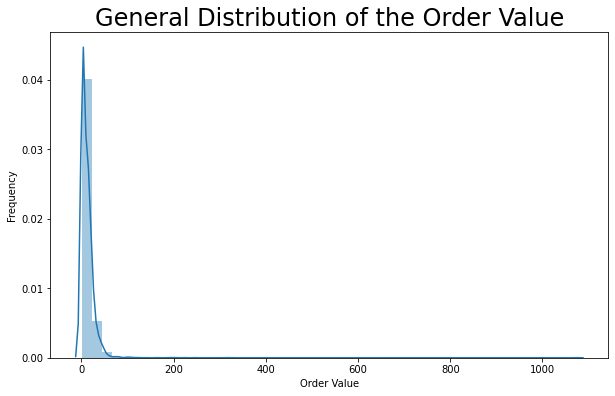

In [15]:
plt.figure(figsize=(10,6))
sns.distplot(grouped)
plt.xlabel("Order Value")
plt.ylabel("Frequency")
plt.title("General Distribution of the Order Value", size=24)

We can see that the data is skewed by some outliers. To have a better picture, let's drop this value and visualise it again.

In [16]:
#Looking for an outlier
sorted = df.sort_values('order_value', ascending=False)
print(sorted)

      order_id  quantity  ... item_price order_value
3598      1443        15  ...     44.25       663.75
4152      1660        10  ...     15.00       150.00
1254       511         4  ...     35.00       140.00
3602      1443         4  ...     35.00       140.00
3887      1559         8  ...     13.52       108.16
...        ...       ...  ...        ...         ...
107         47         1  ...      1.09         1.09
195         87         1  ...      1.09         1.09
434        188         1  ...      1.09         1.09
2814      1117         1  ...      1.09         1.09
4069      1629         1  ...      1.09         1.09

[4622 rows x 6 columns]


In [18]:
#Dropping the outlier
data = df.drop([df.index[3598]])
data = data.groupby(['order_id']).sum()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'General Distribution of the Order Value')

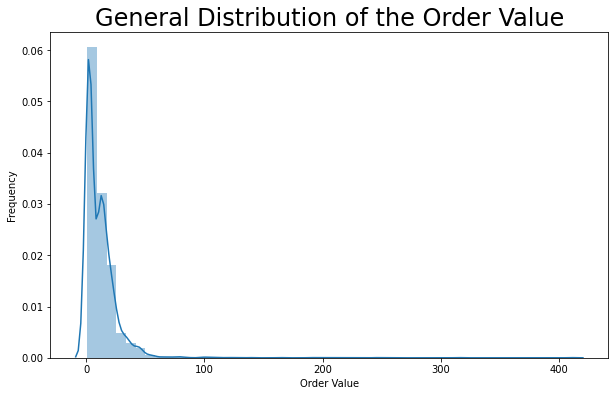

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
sns.distplot(data)
plt.xlabel("Order Value")
plt.ylabel("Frequency")
plt.title("General Distribution of the Order Value", size=24)

# Finding the most common picks and matches in the menu

In [22]:
common_match = df.groupby('order_id')['item_name'].unique().astype(str).value_counts()
common_match

['Chicken Bowl' 'Chips and Guacamole']                                                        68
['Chicken Bowl']                                                                              61
['Chicken Burrito']                                                                           51
['Chicken Burrito' 'Chips and Guacamole']                                                     37
['Steak Burrito' 'Chips and Guacamole']                                                       26
                                                                                              ..
['Chicken Burrito' 'Chips and Guacamole' '6 Pack Soft Drink']                                  1
['Chips and Guacamole' 'Chicken Soft Tacos' 'Chips']                                           1
['Barbacoa Bowl' 'Chips' 'Chicken Soft Tacos' 'Chips and Guacamole'\n 'Canned Soft Drink']     1
['Canned Soft Drink' 'Bottled Water' 'Steak Burrito']                                          1
['Carnitas Burrito' 'Veggie Sa

# Finding the most common matches based on the first chosen item.

In [23]:
df1 = df.reset_index()
df1 = df1.merge(df1, on='order_id').query('index_x > index_y')

df1 = pd.DataFrame(np.sort(df1[['item_name_x', 'item_name_y']].to_numpy(), axis=1))
matched = df1.groupby([*df1]).size().sort_values(ascending=False)
matched[:30]

0                    1                                  
Chicken Bowl         Chips and Guacamole                    179
                     Chicken Bowl                           164
                     Chicken Burrito                        155
                     Chips                                  143
Canned Soft Drink    Chicken Bowl                           134
Chicken Burrito      Chips and Guacamole                    128
                     Steak Burrito                          108
Chicken Bowl         Steak Bowl                              87
Canned Soft Drink    Chicken Burrito                         82
Chips and Guacamole  Steak Burrito                           79
Chicken Burrito      Chicken Burrito                         78
Bottled Water        Chicken Bowl                            74
Canned Soft Drink    Chips and Guacamole                     67
Chicken Bowl         Steak Burrito                           63
Canned Soft Drink    Chips                     